# Assignment8

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
import seaborn as sns

# How Much is Your Car Worth?

Data about the retail price of 2005 General Motors cars can be found in `car_data.csv`.

The columns are:

1. Price: suggested retail price of the used 2005 GM car in excellent condition.
2. Mileage: number of miles the car has been driven
3. Make: manufacturer of the car such as Saturn, Pontiac, and Chevrolet
4. Model: specific models for each car manufacturer such as Ion, Vibe, Cavalier
5. Trim (of car): specific type of car model such as SE Sedan 4D, Quad Coupe 2D          
6. Type: body type such as sedan, coupe, etc.      
7. Cylinder: number of cylinders in the engine        
8. Liter: a more specific measure of engine size     
9. Doors: number of doors           
10. Cruise: indicator variable representing whether the car has cruise control (1 = cruise)
11. Sound: indicator variable representing whether the car has upgraded speakers (1 = upgraded)
12. Leather: indicator variable representing whether the car has leather seats (1 = leather)

## Tasks, Part 1

1. Find the linear regression equation for mileage vs price.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

## Tasks, Part 2

1. Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.
2. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
3. Find the combination of the factors that is the best predictor for price.

## Tasks, Hard Mode

1. Research dummy variables in scikit-learn to see how to use the make, model, and body type.
2. Find the best combination of factors to predict price.

In [13]:
df = pd.read_csv("car_data.csv")

## Tasks, Part 1

1.Find the linear regression equation for mileage vs price.

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OrdinalEncoder

model = LinearRegression()
x = df[['Mileage']]
y = df['Price']


model.fit(x,y)

print('Intercept:',model.intercept_)
print('Coefficient:',model.coef_[0])

Intercept: 24764.559006061685
Coefficient: -0.1725205027912493


2.Chart the original data and the equation on the chart.

Text(0.5, 1.0, 'Mileage vs Price')

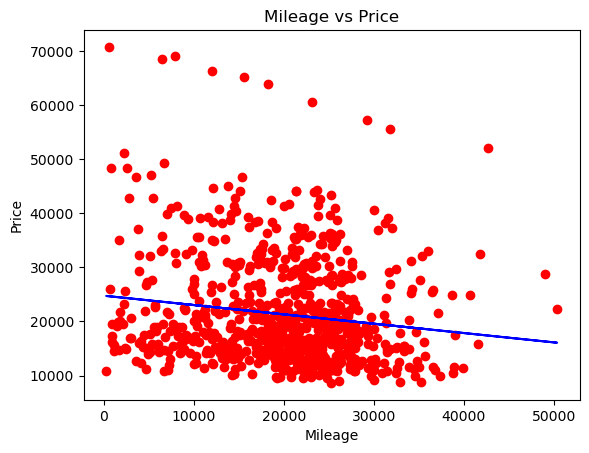

In [21]:
plt.scatter(x,y,color='red')
plt.plot(x,model.predict(x),color='blue')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.title('Mileage vs Price')

3.Find the equation's  𝑅2
  score (use the .score method) to determine whether the equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [16]:
print('r-squared score:',model.score(x,y))

r-squared score: 0.02046344732348926


## Tasks, Part 2

1.Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.

In [17]:
value = ['Mileage','Cylinder','Liter','Doors','Cruise','Sound','Leather']

x = df[value]
y = df['Price']
model.fit(x,y)
print('Intercept:',model.intercept_)
print('Coefficient:',model.coef_)

Intercept: 6758.755143598079
Coefficient: [-1.69747832e-01  3.79237893e+03 -7.87220732e+02 -1.54274585e+03
  6.28899715e+03 -1.99379528e+03  3.34936162e+03]


2.Find the equation's  𝑅2
  score (use the .score method) to determine whether the equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [18]:
print('r-Squared score:',model.score(x,y))

r-Squared score: 0.446264353672838


3.Find the combination of the factors that is the best predictor for price.

## Tasks, Hard Mode

1.Research dummy variables in scikit-learn to see how to use the make, model, and body type.

In [22]:
ore = OrdinalEncoder()
Encoded_Make = ore.fit_transform(df[['Make']])
Encoded_Model = ore.fit_transform(df[['Model']])
Encoded_Type = ore.fit_transform(df[['Type']])

df['Encoded_Make'] = Encoded_Make
df['Encoded_Make'] = df['Encoded_Make'].astype(int)
df['Encoded_Model'] = Encoded_Model
df['Encoded_Model']  = df['Encoded_Model'].astype(int)
df['Encoded_Type'] = Encoded_Type
df['Encoded_Type'] = df['Encoded_Type'].astype(int)

val = ['Encoded_Make','Encoded_Model','Encoded_Type']
x = df[val]
y = df['Price']
model.fit(x,y)
print('Intercept',model.intercept_)
print('Coefficient',model.coef_)
print('r-squared score',model.score(x,y))

Intercept 29358.83854664565
Coefficient [-1205.32901427   -80.409661   -1593.0854307 ]
r-squared score 0.05132002689086157


2.Find the best combination of factors to predict price.

In [25]:
print(df.corr())

                  Price   Mileage  Cylinder     Liter     Doors    Cruise  \
Price          1.000000 -0.143051  0.569086  0.558146 -0.138750  0.430851   
Mileage       -0.143051  1.000000 -0.029461 -0.018641 -0.016944  0.025037   
Cylinder       0.569086 -0.029461  1.000000  0.957897  0.002206  0.354285   
Liter          0.558146 -0.018641  0.957897  1.000000 -0.079259  0.377509   
Doors         -0.138750 -0.016944  0.002206 -0.079259  1.000000 -0.047674   
Cruise         0.430851  0.025037  0.354285  0.377509 -0.047674  1.000000   
Sound         -0.124348 -0.026146 -0.089704 -0.065527 -0.062530 -0.091730   
Leather        0.157197  0.001005  0.075520  0.087332 -0.061969 -0.070573   
Encoded_Make  -0.131644  0.028632 -0.474727 -0.421690 -0.142858 -0.124232   
Encoded_Model -0.026599 -0.026810  0.359248  0.347102 -0.027162 -0.088165   
Encoded_Type  -0.163871 -0.006547 -0.067134 -0.112378  0.907163 -0.017463   

                  Sound   Leather  Encoded_Make  Encoded_Model  Encoded_Typ

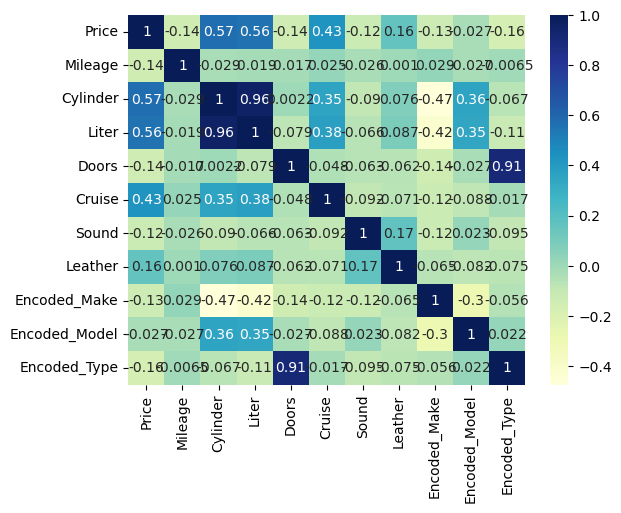

In [39]:
heat = sns.heatmap(df.corr(),cmap='YlGnBu',annot = True)
plt.show()